In [0]:
import pandas as pd
import numpy as np


In [0]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [0]:
train.head(5), test.head(5)

(        loan_id source       financial_institution  ...  m11  m12  m13
 0  268055008619      Z  Turner, Baldwin and Rhodes  ...    0    0    1
 1  672831657627      Y  Swanson, Newton and Miller  ...    1    0    1
 2  742515242108      Z              Thornton-Davis  ...    0    0    1
 3  601385667462      X                       OTHER  ...    1    1    1
 4  273870029961      X                       OTHER  ...   10   11    1
 
 [5 rows x 29 columns],
    loan_id source      financial_institution  interest_rate  ...  m9  m10 m11 m12
 0        1      Y              Browning-Hart          3.875  ...   0    0   0   0
 1        2      X                      OTHER          4.500  ...   0    0   0   0
 2        3      Y                      OTHER          4.500  ...   0    0   0   0
 3        4      X  Miller, Mcclure and Allen          4.125  ...   0    0   0   0
 4        5      X              Browning-Hart          3.250  ...   0    0   0   0
 
 [5 rows x 28 columns])

In [0]:
train.describe()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,116058.000000,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,0.575971,6.517207,3.868961,2.082262e+05,292.280997,0.703062,1.709507,67.431939,1.593186,30.742293,769.926778,0.739363,2.786288,459.611565,0.003257,0.003197,0.002059,0.001973,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.704715,4.450898,0.461020,1.146851e+05,89.762415,0.678898,0.688385,17.291719,0.491242,9.730798,42.210706,0.823953,8.096464,381.946926,0.056977,0.063354,0.051391,0.055427,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000010e+11,0.000000,0.000000,2.250000,1.100000e+04,60.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244655e+11,0.000000,1.000000,3.500000,1.200000e+05,180.000000,0.000000,1.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486240e+11,0.000000,8.000000,3.875000,1.830000e+05,360.000000,1.000000,2.000000,72.000000,2.000000,31.000000,782.000000,0.000000,0.000000,740.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743035e+11,1.000000,8.000000,4.125000,2.780000e+05,360.000000,1.000000,2.000000,80.000000,2.000000,39.000000,800.000000,1.000000,0.000000,791.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999970e+11,2.000000,18.000000,6.750000,1.200000e+06,360.000000,2.000000,3.000000,97.000000,2.000000,64.000000,840.000000,2.000000,40.000000,836.000000,1.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null float64
source                      116058 non-null int64
financial_institution       116058 non-null int64
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null int64
first_payment_date          116058 non-null int64
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null int64
debt_to_income_ratio        116058 non-null int64
borrower_credit_score       116058 non-null int64
loan_purpose                116058 non-null int64
insurance_percent           116058 non-null int64
co-borrower_credit_score    116058 non-null int64
insurance_type              116058 non-null int64
m1                          116058 non-null int64
m2                          116058 

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35866 entries, 0 to 35865
Data columns (total 28 columns):
loan_id                     35866 non-null int64
source                      35866 non-null int64
financial_institution       35866 non-null int64
interest_rate               35866 non-null float64
unpaid_principal_bal        35866 non-null int64
loan_term                   35866 non-null int64
origination_date            35866 non-null int64
first_payment_date          35866 non-null int64
loan_to_value               35866 non-null int64
number_of_borrowers         35866 non-null int64
debt_to_income_ratio        35866 non-null int64
borrower_credit_score       35866 non-null int64
loan_purpose                35866 non-null int64
insurance_percent           35866 non-null int64
co-borrower_credit_score    35866 non-null int64
insurance_type              35866 non-null int64
m1                          35866 non-null int64
m2                          35866 non-null int64
m3     

In [0]:
train['financial_institution'].unique(),train['source'].unique(),train['origination_date'].unique(),train['first_payment_date'].unique(),train['loan_purpose'].unique()

(array(['Turner, Baldwin and Rhodes', 'Swanson, Newton and Miller',
        'Thornton-Davis', 'OTHER', 'Browning-Hart', 'Richardson Ltd',
        'Edwards-Hoffman', 'Richards-Walters', 'Martinez, Duffy and Bird',
        'Miller, Mcclure and Allen', 'Anderson-Taylor',
        'Taylor, Hunt and Rodriguez', 'Nicholson Group',
        'Cole, Brooks and Vincent', 'Sanchez, Hays and Wilkerson',
        'Sanchez-Robinson', 'Suarez Inc', 'Romero, Woods and Johnson',
        'Chapman-Mcmahon'], dtype=object),
 array(['Z', 'Y', 'X'], dtype=object),
 array(['2012-03-01', '2012-01-01', '2012-02-01'], dtype=object),
 array(['05/2012', '03/2012', '04/2012', '02/2012'], dtype=object),
 array(['C86', 'B12', 'A23'], dtype=object))

In [0]:
test['financial_institution'].unique(),test['source'].unique(),test['origination_date'].unique(),test['first_payment_date'].unique(),test['loan_purpose'].unique()

(array(['Browning-Hart', 'OTHER', 'Miller, Mcclure and Allen',
        'Sanchez, Hays and Wilkerson', 'Thornton-Davis',
        'Swanson, Newton and Miller', 'Cole, Brooks and Vincent',
        'Sanchez-Robinson', 'Edwards-Hoffman',
        'Turner, Baldwin and Rhodes', 'Richardson Ltd',
        'Taylor, Hunt and Rodriguez', 'Nicholson Group', 'Suarez Inc',
        'Martinez, Duffy and Bird', 'Anderson-Taylor', 'Richards-Walters',
        'Chapman-Mcmahon', 'Romero, Woods and Johnson'], dtype=object),
 array(['Y', 'X', 'Z'], dtype=object),
 array(['01/02/12', '01/01/12', '01/03/12'], dtype=object),
 array(['Apr-12', 'Mar-12', 'May-12', 'Feb-12'], dtype=object),
 array(['A23', 'C86', 'B12'], dtype=object))

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train['financial_institution'] = le.fit_transform(train['financial_institution'])
test['financial_institution'] = le.fit_transform(test['financial_institution'])
train['source'] = le.fit_transform(train['source'])
test['source'] = le.fit_transform(test['source'])
train['origination_date'] = le.fit_transform(train['origination_date'])
test['origination_date'] = le.fit_transform(test['origination_date'])
train['first_payment_date'] = le.fit_transform(train['first_payment_date'])
test['first_payment_date'] = le.fit_transform(test['first_payment_date'])
train['loan_purpose'] = le.fit_transform(train['loan_purpose'])
test['loan_purpose'] = le.fit_transform(test['loan_purpose'])

In [0]:
train['financial_institution'].unique(),train['source'].unique(),train['origination_date'].unique(),train['first_payment_date'].unique(),train['loan_purpose'].unique()

(array([18, 15, 17,  8,  1, 10,  4,  9,  5,  6,  0, 16,  7,  3, 12, 13, 14,
        11,  2]),
 array([2, 1, 0]),
 array([2, 0, 1]),
 array([3, 1, 2, 0]),
 array([2, 1, 0]))

In [0]:
test['financial_institution'].unique(),test['source'].unique(),test['origination_date'].unique(),test['first_payment_date'].unique(),test['loan_purpose'].unique()

(array([ 1,  8,  6, 12, 17, 15,  3, 13,  4, 18, 10, 16,  7, 14,  5,  0,  9,
         2, 11]),
 array([1, 0, 2]),
 array([1, 0, 2]),
 array([0, 2, 3, 1]),
 array([0, 2, 1]))

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize

X_train = train.drop("m13", axis=1)
X_train = X_train.drop("loan_id", axis=1)
Y_train = train["m13"].values
X_test = test.drop("loan_id", axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(np_scaled)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_test)
X_test = pd.DataFrame(np_scaled)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
X_train.shape, Y_train.shape, X_test.shape

((116058, 27), (116058,), (35866, 27))

In [0]:
#Linear Regression

linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred = linreg.predict(X_test)
acc_log = round(linreg.score(X_train, Y_train) * 100, 2)
acc_log

ValueError: ignored

In [0]:
#Support Vector Machines (SVM)
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


99.5

In [0]:
#K-nearest (k-NN)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

99.53

In [0]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

98.06

In [0]:
#Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

99.56

In [0]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

99.57

In [0]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

99.51

In [0]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [0]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [0]:
models = pd.DataFrame({
        'Model': ['Support Vector Machines', 'KNN', 'Linear Regression', 'Random Forest', 'Naive Bayes', 'Perceptron',
                  'Stochastic Gradient Descent', 'Linear SVC', 'Decision Tree'],
        'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]
    })
models.sort_values(by='Score', ascending=False)

NameError: ignored

In [0]:
Y_pred =np.array(Y_pred).tolist()
y_pred = np.array(Y_pred)

In [0]:
submission = pd.DataFrame({
        "loan_id": test["loan_id"],
        "m13":y_pred
    })
submission.to_csv('./submission.csv', index=False)
print(submission.head(10))

   loan_id   m13
0        1  fail
1        2  fail
2        3  fail
3        4  fail
4        5  fail
5        6  fail
6        7  fail
7        8  fail
8        9  fail
9       10  fail


In [0]:
from google.colab import files
files.download('submission.csv')

In [0]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [0]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,2.680000e+11,2,18,4.250,214000,360,2,3,95,1,22,694,2,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,pass
1,6.730000e+11,1,15,4.875,144000,360,0,1,72,1,44,697,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,pass
2,7.430000e+11,2,17,3.250,366000,180,0,1,49,1,33,780,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,pass
3,6.010000e+11,0,8,4.750,135000,360,1,2,46,2,44,633,1,0,638,0,0,0,0,0,0,0,0,0,1,1,1,1,pass
4,2.740000e+11,0,8,4.750,124000,360,1,2,80,1,43,681,2,0,0,0,0,1,2,3,4,5,6,7,8,9,10,11,pass


In [0]:
feature_columns_to_use = ['source',	'financial_institution',	'interest_rate',	'unpaid_principal_bal',	'loan_term',	'origination_date',	'first_payment_date',	'loan_to_value',	'number_of_borrowers',	'debt_to_income_ratio',	'borrower_credit_score',	'loan_purpose',	'insurance_percent',	'co-borrower_credit_score',	'insurance_type',	'm1',	'm2','m3',	'm4',	'm5',	'm6',	'm7',	'm8',	'm9',	'm10',	'm11',	'm12']

In [0]:
big_X = train[feature_columns_to_use].append(test[feature_columns_to_use])
big_X_imputed = DataFrameImputer().fit_transform(big_X)

In [0]:
train_X = big_X_imputed[0:train.shape[0]].as_matrix()
test_X = big_X_imputed[train.shape[0]::].as_matrix()
train_y = train['m13']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
import xgboost as xgb
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(train_X, train_y)
predictions = gbm.predict(test_X)

In [0]:
import xgboost as xgb
gbm = xgb.XGBClassifier(loss='deviance', learning_rate=0.1, n_estimators=100,
                 subsample=1.0, criterion='friedman_mse', min_samples_split=2,
                 min_samples_leaf=1, min_weight_fraction_leaf=0.,
                 max_depth=30, min_impurity_split=1e-7).fit(train_X, train_y)
predictions = gbm.predict(test_X)

In [0]:
A =np.array(predictions).tolist()
predictions = np.array(A)

In [0]:
predictions

array(['fail', 'fail', 'fail', ..., 'fail', 'fail', 'fail'], dtype='<U4')

In [0]:
submission = pd.DataFrame({ 'loan_id': test['loan_id'],
                            'm13': predictions })
submission.to_csv("XGBOOST.csv", index=False)

In [0]:
from google.colab import files
files.download('XGBOOST.csv')

**2nd**

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from lightgbm import LGBMClassifier
import lightgbm as lgb


from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback
from sklearn.metrics import f1_score, precision_score

from sklearn.utils import resample

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from scipy.stats import uniform as sp_uniform

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

import warnings; warnings.simplefilter('ignore')

from sklearn import preprocessing
import pandas_profiling

from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
from imblearn.combine import SMOTETomek

Using TensorFlow backend.


In [0]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [8]:
pandas_profiling.ProfileReport(train)

Number of variables,29
Number of observations,116058
Total Missing (%),0.0%
Total size in memory,25.7 MiB
Average record size in memory,232.0 B
Numeric,20
Categorical,5
Boolean,3
Date,0
Text (Unique),0
Rejected,1


In [9]:
# Descriptive analysis
train.describe(include='all')

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058,116058,116058.000000,1.160580e+05,116058.000000,116058,116058,116058.000000,116058.000000,116058.000000,116058.000000,116058,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
unique,NaN,3,19,NaN,NaN,NaN,3,4,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,X,OTHER,NaN,NaN,NaN,2012-02-01,04/2012,NaN,NaN,NaN,NaN,A23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,63858,49699,NaN,NaN,NaN,52334,52840,NaN,NaN,NaN,NaN,58462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.494155e+11,NaN,NaN,3.868961,2.082262e+05,292.280997,NaN,NaN,67.431939,1.593186,30.742293,769.926778,NaN,2.786288,459.611565,0.003257,0.003197,0.002059,0.001973,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,NaN,NaN,0.461020,1.146851e+05,89.762415,NaN,NaN,17.291719,0.491242,9.730798,42.210706,NaN,8.096464,381.946926,0.056977,0.063354,0.051391,0.055427,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,NaN,NaN,2.250000,1.100000e+04,60.000000,NaN,NaN,6.000000,1.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,NaN,NaN,3.500000,1.200000e+05,180.000000,NaN,NaN,57.000000,1.000000,23.000000,751.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,NaN,NaN,3.875000,1.830000e+05,360.000000,NaN,NaN,72.000000,2.000000,31.000000,782.000000,NaN,0.000000,740.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,NaN,NaN,4.125000,2.780000e+05,360.000000,NaN,NaN,80.000000,2.000000,39.000000,800.000000,NaN,0.000000,791.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
#class value count
train['m13'].value_counts()
sns.countplot(x='m13',data=train)
plt.show()
(train["m13"].value_counts()/train.shape[0]*100)


0    99.451998
1     0.548002
Name: m13, dtype: float64

In [0]:
#Check for delinquency counts according to loan origination date
fig = plt.figure(figsize=(15,10))
ax = sns.countplot(x='origination_date', hue='m13', data=train)
ax.set_title('Loan date')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
plt.show();

In [0]:
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(train.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [0]:
dataframe=train

In [0]:
#Fetaure extraction using delinqency columns
## Adding all the month wise loan performance columns given to create new column 'm24'
dataframe['m24'] =  dataframe['m4'] + dataframe['m5'] +dataframe['m6'] + \
    dataframe['m7'] +dataframe['m8'] +dataframe['m9'] + dataframe['m10'] +\
    dataframe['m11'] +dataframe['m12']

In [0]:

## Dropping Un-necessary and highely correlated columns
drop_list = ['origination_date', 'first_payment_date',
                 'loan_id', 'co-borrower_credit_score', 'insurance_type', 'insurance_percent',
                 'financial_institution', 'loan_to_value', 'm3','m2', 'm1', 'debt_to_income_ratio']
dataframe=dataframe.drop(drop_list, axis=1)

In [17]:
#Select categorical and numerical features
df_cat = dataframe.select_dtypes(['object','category'])
df_num = dataframe.select_dtypes(exclude = ['object','category'])

dummy_list = df_cat.columns
for c in dummy_list:    
    df_cat[c] = pd.Categorical(df_cat[c])
    
dfC = pd.concat([df_num, df_cat], axis=1)
dfC.shape

(116058, 18)

In [0]:
# Dummyfy the categorical feature list

dfw1 = dfC.copy()
dfw1 = pd.get_dummies(dfw1, columns = dummy_list,  drop_first=True)

In [19]:
dfw1.head()

,interest_rate,unpaid_principal_bal,loan_term,number_of_borrowers,borrower_credit_score,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m24,source_Y,source_Z,loan_purpose_B12,loan_purpose_C86
0,4.250,214000,360,1.0,694.0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1
1,4.875,144000,360,1.0,697.0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0
2,3.250,366000,180,1.0,780.0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,4.750,135000,360,2.0,633.0,0,0,0,0,0,1,1,1,1,1,4,0,0,1,0
4,4.750,124000,360,1.0,681.0,3,4,5,6,7,8,9,10,11,1,63,0,0,0,1


In [0]:
#Split the Train and Validation dataset
yw1 = dfw1["m13"]
Xw1 = dfw1.drop('m13', axis=1)

Xw1_train, Xw1_val, yw1_train, yw1_val =train_test_split(Xw1, yw1, test_size=0.05, random_state=42)

### keeping complete data for training
Xw1_train = Xw1
yw1_train = yw1

In [21]:
print(Xw1_train.shape)
print(Xw1_val.shape)
print(yw1_train.shape)
print(yw1_val.shape)

(116058, 19)
(5803, 19)
(116058,)
(5803,)


In [0]:
#Do SMOTE
#As it is class imbalance dataset, tried UP-sampling , down sampling, and SMOTE but found good score with SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
Xw1_train, yw1_train = smote.fit_sample(Xw1_train, yw1_train)

In [23]:

#Build RF model
#Tried Logistic Regression, RF , LSTM with different set of features along with tuning parametrs, finally could achieve good results with RF Calssifier mentioned below using only 19 features.

# Fit the model
model = RandomForestClassifier(criterion ='entropy', max_depth = 10, max_features ='auto',
                            n_estimators = 100, class_weight='balanced', n_jobs=-1, random_state=42 )


model.fit(Xw1_train, yw1_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [27]:
#Check score and important variables

predictions_clf=model.predict(Xw1_val)
print('Testing Accuarcy: ',accuracy_score(yw1_val, predictions_clf))
print("Training Accuracy: ", model.score(Xw1_train, yw1_train))

    # making a classification report
cr = classification_report(yw1_val , predictions_clf)
print(cr)

    # making a confusion matrix
cm1 = confusion_matrix(yw1_val, predictions_clf)
print(cm1)

Testing Accuarcy:  0.9967258314664829
Training Accuracy:  0.988693663253106
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5772
           1       0.83      0.48      0.61        31

    accuracy                           1.00      5803
   macro avg       0.92      0.74      0.81      5803
weighted avg       1.00      1.00      1.00      5803

[[5769    3]
 [  16   15]]


In [28]:
# Check for Important variables

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xw1.shape[1]):
    print("%d. feature %d : %s : (%f)" % (f + 1, indices[f], Xw1.iloc[:,indices[f]].name, importances[indices[f]]))

1. feature 14 : m24 : (0.278875)
2. feature 13 : m12 : (0.163405)
3. feature 12 : m11 : (0.085605)
4. feature 3 : number_of_borrowers : (0.076296)
5. feature 11 : m10 : (0.062423)
6. feature 15 : source_Y : (0.047376)
7. feature 9 : m8 : (0.044001)
8. feature 4 : borrower_credit_score : (0.038247)
9. feature 10 : m9 : (0.034941)
10. feature 17 : loan_purpose_B12 : (0.032162)
11. feature 0 : interest_rate : (0.026567)
12. feature 18 : loan_purpose_C86 : (0.025947)
13. feature 8 : m7 : (0.021808)
14. feature 2 : loan_term : (0.015263)
15. feature 6 : m5 : (0.015248)
16. feature 16 : source_Z : (0.013513)
17. feature 1 : unpaid_principal_bal : (0.010331)
18. feature 7 : m6 : (0.005626)
19. feature 5 : m4 : (0.002367)


In [29]:
#Predict on Unseen Data

test_df = pd.read_csv("test.csv",na_values=["?",","])

test_df['m24'] =  test_df['m5'] +test_df['m6'] +test_df['m7'] +test_df['m8'] +test_df['m9'] + test_df['m10'] +test_df['m11'] +test_df['m12']

test_df=test_df.drop(drop_list, axis=1)

test_df_cat = test_df.select_dtypes(['object','category'])
test_df_num = test_df.select_dtypes(exclude = ['object','category'])

for c in dummy_list:    
    test_df_cat[c] = pd.Categorical(test_df_cat[c])

test_dfC = pd.concat([test_df_num, test_df_cat], axis=1)

test_dfw1 = test_dfC.copy()
test_dfw1 = pd.get_dummies(test_dfw1, columns = dummy_list,  drop_first=True)
test_dfw1.shape

(35866, 19)

In [0]:
test_pred = model.predict(test_dfw1)


In [32]:
submission = pd.DataFrame({
        "loan_id": test["loan_id"],
        "m13":test_pred
    })
submission.to_csv('./submission.csv', index=False)
print(submission.head(10))

   loan_id  m13
0        1    0
1        2    0
2        3    0
3        4    0
4        5    0
5        6    0
6        7    0
7        8    0
8        9    0
9       10    0


In [0]:
from google.colab import files
files.download('submission.csv')

#**3rd**

In [0]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [0]:
train_data = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')

In [36]:
#Class Balanced or Imbalanced?
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [37]:
train_data['m13'].value_counts()

0    115422
1       636
Name: m13, dtype: int64

In [38]:
train_data[['financial_institution','m13']].pivot_table(index='financial_institution', columns='m13', 
                        aggfunc=len, fill_value=0)

m13,0,1
financial_institution,,
Anderson-Taylor,480,3
Browning-Hart,31677,175
Chapman-Mcmahon,388,0
"Cole, Brooks and Vincent",1630,12
Edwards-Hoffman,4816,41
"Martinez, Duffy and Bird",4692,23
"Miller, Mcclure and Allen",3139,19
Nicholson Group,2105,11
OTHER,49430,269


In [0]:
defaultpayment = train_data[train_data['m13']==1]['interest_rate'].values

successpayment = train_data[train_data['m13']==0]['interest_rate'].values

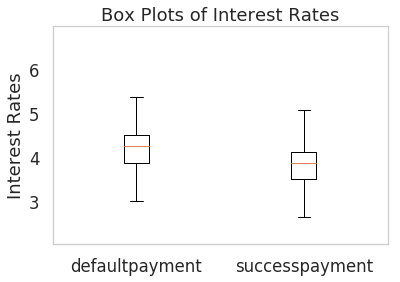

In [40]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([defaultpayment, successpayment])
plt.title('Box Plots of Interest Rates')
plt.xticks([1,2],('defaultpayment','successpayment'))
plt.ylabel('Interest Rates')
plt.grid()
plt.show()

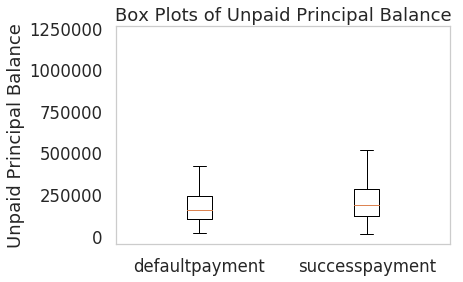

In [41]:
defaultpayment = train_data[train_data['m13']==1]['unpaid_principal_bal'].values

successpayment = train_data[train_data['m13']==0]['unpaid_principal_bal'].values

plt.boxplot([defaultpayment, successpayment])
plt.title('Box Plots of Unpaid Principal Balance')
plt.xticks([1,2],('defaultpayment','successpayment'))
plt.ylabel('Unpaid Principal Balance')
plt.grid()
plt.show()

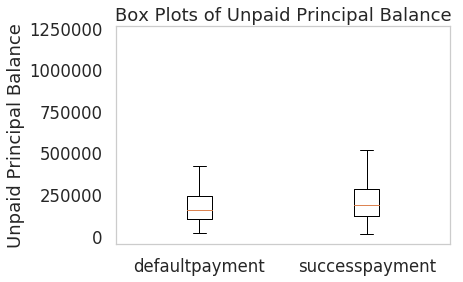

In [42]:
defaultpayment = train_data[train_data['m13']==1]['unpaid_principal_bal'].values

successpayment = train_data[train_data['m13']==0]['unpaid_principal_bal'].values

plt.boxplot([defaultpayment, successpayment])
plt.title('Box Plots of Unpaid Principal Balance')
plt.xticks([1,2],('defaultpayment','successpayment'))
plt.ylabel('Unpaid Principal Balance')
plt.grid()
plt.show()

In [0]:
def format_date(col):
    temp = []
    for x in pd.to_datetime(col, format="%Y-%m-%d"):
        if x > pd.to_datetime('today'):    temp.append(x - pd.DateOffset(years=100))
        else:                              temp.append(x)
    return temp

In [0]:
train_data['origination_date']  =  format_date(train_data['origination_date'])
train_data['origination_day']    =  train_data['origination_date'].dt.day
train_data['origination_month']  =  train_data['origination_date'].dt.month
train_data['origination_year']   =  train_data['origination_date'].dt.year

In [0]:
def format_date_test(col):
    temp = []
    for x in pd.to_datetime(col, format="%d/%m/%y"):
        if x > pd.to_datetime('today'):    temp.append(x - pd.DateOffset(years=100))
        else:                              temp.append(x)
    return temp

In [0]:
test_data['origination_date']  =  format_date_test(test_data['origination_date'])
test_data['origination_day']    =  test_data['origination_date'].dt.day
test_data['origination_month']  =  test_data['origination_date'].dt.month
test_data['origination_year']   =  test_data['origination_date'].dt.year

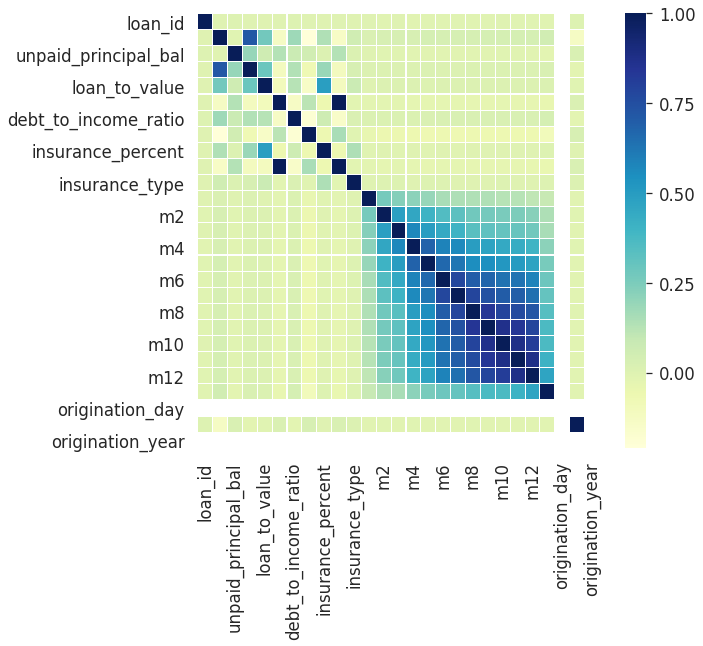

In [48]:
corrmat = train_data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [0]:
#Feature Engineering:

# How many times in last one year a person becomes defaulter.
df = pd.DataFrame([0 for i in range(train_data.shape[0])] ,columns=['number_of_times_default'])
for i in range(0,train_data.shape[0]):
    count = 0
    for j in train_data.loc[i:i, 'm1':'m12'].values.tolist()[0][::-1]:
        if j != 0:
            count += 1
    df['number_of_times_default'].iloc[i] = count

train_data = pd.concat([train_data,df], axis=1)

df_test = pd.DataFrame([0 for i in range(test_data.shape[0])] ,columns=['number_of_times_default'])

In [0]:
test_data = pd.concat([test_data,df_test], axis=1)

In [0]:

all_onehot = []
all_onehot_test = []
for categorical_var in train_data.select_dtypes(include=['object']):
    if categorical_var not in ['origination_date','first_payment_date']:
        enc = OneHotEncoder(handle_unknown='ignore')
        categorical_var_train = enc.fit_transform(np.array(train_data[categorical_var]).reshape(-1, 1))
        categorical_var_test = enc.transform(np.array(test_data[categorical_var]).reshape(-1, 1))
        all_onehot.append(categorical_var_train.toarray())
        all_onehot_test.append(categorical_var_test.toarray())

In [0]:
target = train_data['m13']
new_train = train_data.drop(['loan_id','source','financial_institution','origination_date','first_payment_date','co-borrower_credit_score','loan_purpose','m13'], axis=1)

new_test = test_data.drop(['loan_id','source','financial_institution','origination_date','first_payment_date','co-borrower_credit_score','loan_purpose'], axis=1)

X_train = np.concatenate([new_train,all_onehot[0],all_onehot[1],all_onehot[2]], axis =1)

X_test = np.concatenate([new_test,all_onehot_test[0],all_onehot_test[1],all_onehot_test[2]], axis =1)

In [0]:
# as the data is imbalanced, we can go for class_weight="balanced" or give a optimal value to scale_pos_weight
xbgr = xgb.XGBClassifier(learning_rate =.1,
 n_estimators=1000,
 max_depth=10,
 min_child_weight=6,
 gamma=.1,
 subsample=0.7,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=4,
 reg_alpha=100,
 class_weight="balanced" ,                      
 seed=27)

In [55]:
xbgr.fit(X_train, target)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=6, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=100, reg_lambda=1, scale_pos_weight=4, seed=27,
              silent=None, subsample=0.7, verbosity=1)

In [56]:
xbgr.fit(X_train, target)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=6, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=100, reg_lambda=1, scale_pos_weight=4, seed=27,
              silent=None, subsample=0.7, verbosity=1)

Text(77.68, 0.5, 'predicted label')

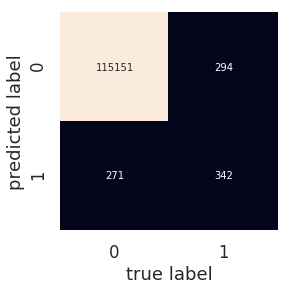

In [57]:
y_pred_train = xbgr.predict(X_train)

mat = confusion_matrix(target, y_pred_train)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [58]:
f1_score(target, y_pred_train)

y_pred = xbgr.predict(X_test)

sam_sub_data = pd.read_csv('sample_submission.csv')

FileNotFoundError: ignored

#**4th**

In [61]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

%cd D:\IPython Jupyter\Analytics Vidya Datasets

[Errno 2] No such file or directory: 'D:IPython JupyterAnalytics Vidya Datasets'
/content


In [62]:
df = pd.read_csv('train.csv')
print(df.shape, df.columns)
df.head()

(116058, 29) Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [63]:
# Missing value in data
df.isnull().sum().sum()

0

In [64]:
numerical_features = df.select_dtypes(include=np.number)
categorical_features = df.select_dtypes(include=np.object)
print("numeric_features: ", numerical_features.shape, numerical_features.columns)
print("categorical_features: ", categorical_features.shape, categorical_features.columns)

numeric_features:  (116058, 24) Index(['loan_id', 'interest_rate', 'unpaid_principal_bal', 'loan_term',
       'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio',
       'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13'],
      dtype='object')
categorical_features:  (116058, 5) Index(['source', 'financial_institution', 'origination_date',
       'first_payment_date', 'loan_purpose'],
      dtype='object')


In [65]:
#Relationship with Numeric Variables Description, Skewness, Kurtosis, Histograms, Boxplots(relationship with m13), Correlation Matrix

numerical_features.iloc[:,:11].describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003257
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.056977
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000


In [66]:
# skewness & kurtosis
pd.DataFrame({"Skewness": df.skew(), "Kurtosis": df.kurt()})

,Skewness,Kurtosis
loan_id,0.004114,-1.197545
interest_rate,0.051326,0.169871
unpaid_principal_bal,0.897524,0.556988
loan_term,-0.692948,-1.293404
loan_to_value,-0.765251,0.078106
number_of_borrowers,-0.379397,-1.856090
debt_to_income_ratio,-0.194303,-0.825119
borrower_credit_score,-3.570945,48.502768
insurance_percent,2.743691,5.871008
co-borrower_credit_score,-0.362473,-1.849904


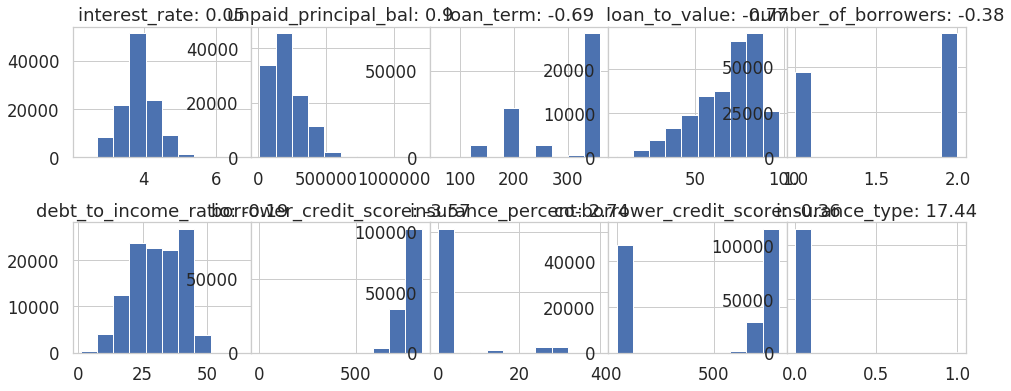

In [67]:
fig, axs = plt.subplots(2,5, figsize=(16, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i,j in zip([i for i in numerical_features.columns.to_list()[1:] if len(i) >3],range(10)):
    axs[j].hist(numerical_features[i])
    axs[j].set_title(i+': '+str(np.round(numerical_features[i].skew(),2)))

In [68]:
numerical_features['m13'].value_counts()      # data is highly imbalance

0    115422
1       636
Name: m13, dtype: int64

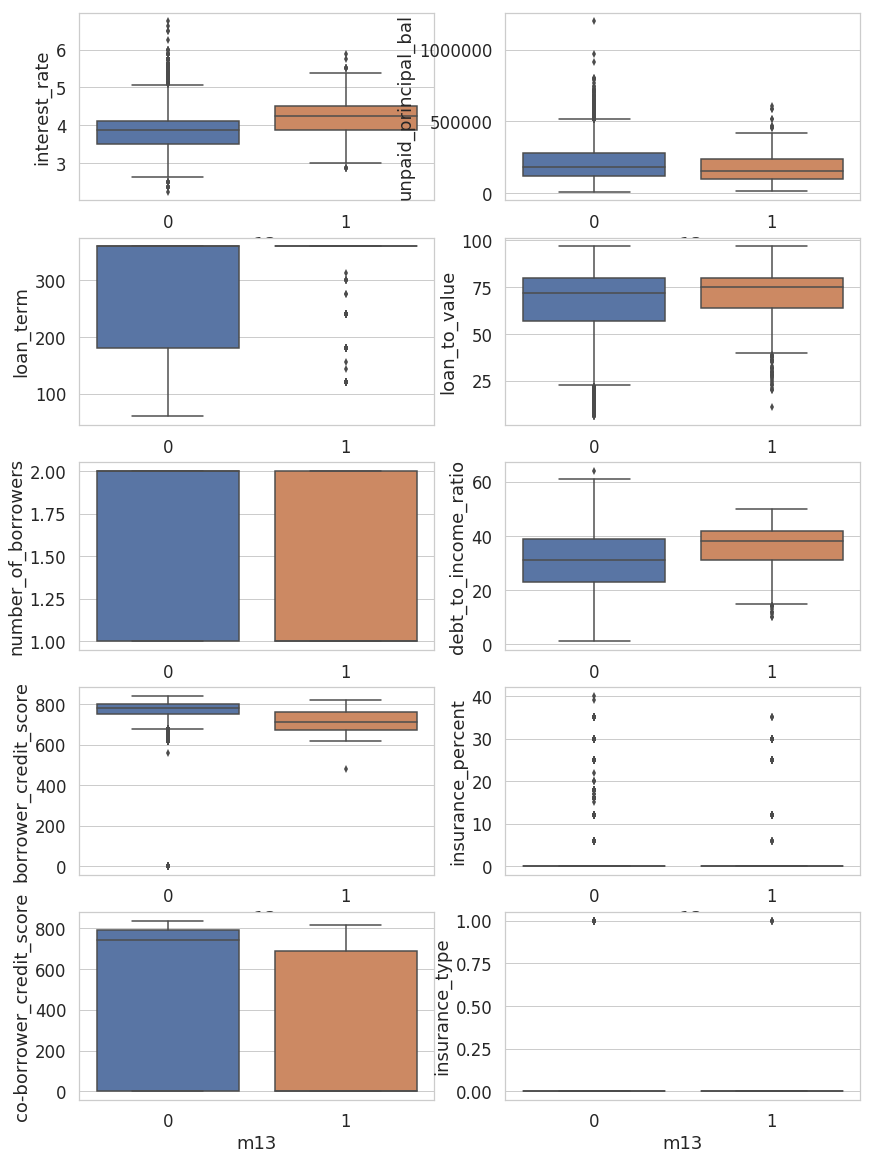

In [69]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9,ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(14,20))
AX = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i,j in zip([i for i in numerical_features.columns.to_list()[1:] if len(i) >3],AX):
    sns.boxplot(x = 'm13', y = i, data =numerical_features,ax=j)

In [70]:
cols = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']
for i in cols:
    print(pd.crosstab(numerical_features[i],numerical_features['m13']))

m13       0    1
m1              
0    115140  589
1       250   43
2        27    3
3         5    1
m13       0    1
m2              
0    115261  583
1       153   43
2         5    8
3         2    1
4         1    1
m13       0    1
m3              
0    115287  581
1       125   42
2         6    8
3         1    3
4         2    1
5         1    1
m13       0    1
m4              
0    115307  553
1       104   64
2         6   10
3         3    5
4         1    2
5         0    1
6         1    1
m13       0    1
m5              
0    115234  518
1       169   80
2        10   23
3         5    7
4         2    4
5         1    2
6         0    1
7         1    1
m13       0    1
m6              
0    115265  520
1       145   69
2         5   21
3         4   12
4         3    6
5         0    4
6         0    2
7         0    1
8         0    1
m13       0    1
m7              
0    115236  492
1       170   96
2        11   17
3         1   12
4         2    6
5         2   

In [0]:
# creating new column: maximum deliquency time month
df['max_deliq'] = df[cols].max(axis=1)

           max_deliq
count  116058.000000
mean        0.023325
std         0.235048
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        14.000000
m13             0    1
max_deliq             
0          113814  233
1            1497  229
2              78   66
3              18   39
4               8   18
5               2   10
6               1   13
7               2   10
8               2    5
9               0    4
10              0    4
11              0    4
14              0    1


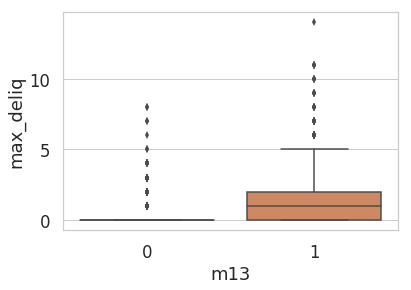

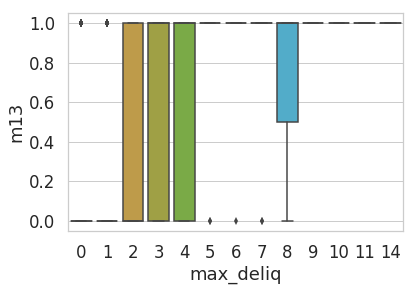

In [72]:
print(df[['max_deliq']].describe())
print(pd.crosstab(df['max_deliq'],df['m13']))
sns.boxplot('m13','max_deliq',data=df)
plt.show()
sns.boxplot('max_deliq','m13',data=df)

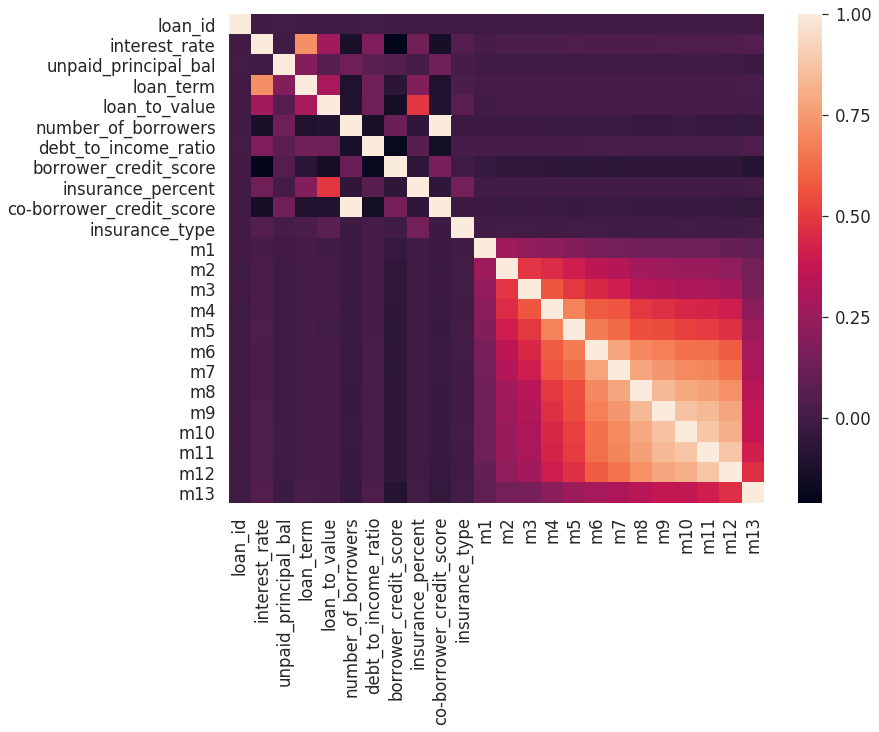

In [73]:
# Correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(numerical_features.corr())

In [74]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]
vif["features"] = numerical_features.columns
vif

,VIF Factor,features
0,5.460580,loan_id
1,2.166196,interest_rate
2,1.119231,unpaid_principal_bal
3,2.309670,loan_term
4,1.423870,loan_to_value
5,58.742619,number_of_borrowers
6,1.084515,debt_to_income_ratio
7,0.493528,borrower_credit_score
8,1.344911,insurance_percent
9,60.138336,co-borrower_credit_score


In [75]:
#Relationship with Categorical Variables
categorical_features.shape, categorical_features.columns

((116058, 5), Index(['source', 'financial_institution', 'origination_date',
        'first_payment_date', 'loan_purpose'],
       dtype='object'))

In [76]:
for i in categorical_features.columns.to_list():
    print("Total unique values for",i,len(categorical_features[i].unique()))
    print("Value Counts for",i,'\n',categorical_features[i].value_counts(),'\n')

Total unique values for source 3
Value Counts for source 
 X    63858
Y    37554
Z    14646
Name: source, dtype: int64 

Total unique values for financial_institution 19
Value Counts for financial_institution 
 OTHER                          49699
Browning-Hart                  31852
Swanson, Newton and Miller      6874
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
Turner, Baldwin and Rhodes      1846
Suarez Inc                      1790
Cole, Brooks and Vincent        1642
Richards-Walters                1459
Taylor, Hunt and Rodriguez      1259
Sanchez-Robinson                1193
Sanchez, Hays and Wilkerson      853
Romero, Woods and Johnson        750
Thornton-Davis                   651
Anderson-Taylor                  483
Richardson Ltd                   473
Chapman-Mcmahon                  388
Name: financial_institution, dtype: int64 

Total unique values for origination_date 3

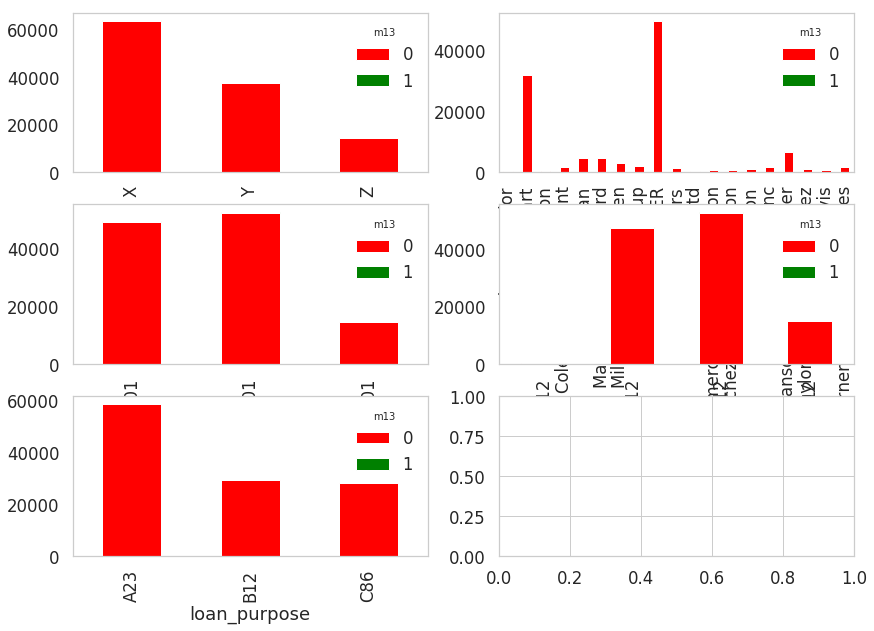

In [77]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
AX = [ax1, ax2, ax3, ax4, ax5]

for i,j in zip(categorical_features.columns.to_list(),AX):
    temp = pd.crosstab(df[i],df['m13'])
    temp.plot(kind='bar',stacked=True,color=['red','green'],grid=False,ax=j)

In [78]:
for i in categorical_features.columns.to_list():
    print(pd.crosstab(df[i],df['m13']))

m13         0    1
source            
X       63553  305
Y       37307  247
Z       14562   84
m13                              0    1
financial_institution                  
Anderson-Taylor                480    3
Browning-Hart                31677  175
Chapman-Mcmahon                388    0
Cole, Brooks and Vincent      1630   12
Edwards-Hoffman               4816   41
Martinez, Duffy and Bird      4692   23
Miller, Mcclure and Allen     3139   19
Nicholson Group               2105   11
OTHER                        49430  269
Richards-Walters              1454    5
Richardson Ltd                 472    1
Romero, Woods and Johnson      748    2
Sanchez, Hays and Wilkerson    851    2
Sanchez-Robinson              1192    1
Suarez Inc                    1785    5
Swanson, Newton and Miller    6828   46
Taylor, Hunt and Rodriguez    1255    4
Thornton-Davis                 648    3
Turner, Baldwin and Rhodes    1832   14
m13                   0    1
origination_date            
2012-01

In [84]:
#Feature Engineering
#For Categorical Variables

# Loading raw_data again

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.shape, df_test.shape

((116058, 29), (35866, 28))

In [85]:
df_train['origination_date'].unique(), df_train['first_payment_date'].unique()

(array(['2012-03-01', '2012-01-01', '2012-02-01'], dtype=object),
 array(['05/2012', '03/2012', '04/2012', '02/2012'], dtype=object))

In [86]:
df_test['origination_date'].unique(), df_test['first_payment_date'].unique()

(array(['01/02/12', '01/01/12', '01/03/12'], dtype=object),
 array(['Apr-12', 'Mar-12', 'May-12', 'Feb-12'], dtype=object))

In [87]:
df_test['m13'] = 'NA'
df = df_train.append(df_test, ignore_index=True)
print(df.shape)

(151924, 29)


In [88]:
# Dates in both train & test data are objects, so will use pandas's map function & generate new column as first payment delay (in months)
df['origination_date'] = df['origination_date'].map({"2012-01-01": 1, "2012-02-01": 2, "2012-03-01": 3,
                                                     "01/01/12": 1, "01/02/12": 2, "01/03/12": 3})
df['first_payment_date'] = df['first_payment_date'].map({"02/2012":2, "03/2012":3, "04/2012":4, "05/2012":5,
                                                         "Feb-12":2, "Mar-12":3, "Apr-12":4, "May-12":5})

df['first_payment_delay'] = df['first_payment_date'] - df['origination_date']
pd.crosstab(df['first_payment_delay'], df['m13'])

m13,0,1,NA
first_payment_delay,,,
1,2976,17,884
2,108719,605,33878
3,3727,14,1104


In [89]:
df.isnull().sum().sum()

0

In [90]:
df['financial_institution_new'] = df['financial_institution'].apply(lambda x: 1 if (x == 'Browning-Hart') or (x == 'Others') else 0)
df['source_new'] = df['source'].apply(lambda x: 1 if (x == 'X') or (x == 'Y') else 0)
print(df['financial_institution_new'].value_counts())
print(df['source_new'].value_counts())

0    109994
1     41930
Name: financial_institution_new, dtype: int64
1    132779
0     19145
Name: source_new, dtype: int64


In [91]:
# One hot encoding for categorical variables
temp = pd.get_dummies(df['financial_institution'])
df = df.join(temp)
print(df.shape)

temp = pd.get_dummies(df['source'])
df = df.join(temp)
print(df.shape)

temp = pd.get_dummies(df['loan_purpose'])
df = df.join(temp)
print(df.shape)

(151924, 51)
(151924, 54)
(151924, 57)


In [92]:
#For Numerical Variables

cols = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

# creating new column: maximum deliquency time month
df['max_deliq'] = df[cols].max(axis=1)

# if 'm12'>0 then 1 else 0
df['m12_new'] = df['m12'].apply(lambda x: 1 if x > 0 else 0)
print(df['m12_new'].value_counts())
print(pd.crosstab(df['m12_new'],df['m13']))

# if delinquency is there in any of last 3 months
df['last3_months'] = 0
df.loc[(df['m10'] > 0) | (df['m11'] > 0) | (df['m12'] > 0),'last3_months'] = 1

print(df['last3_months'].value_counts())
pd.crosstab(df['last3_months'],df['m13'])

0    151281
1       643
Name: m12_new, dtype: int64
m13           0    1     NA
m12_new                    
0        115221  336  35724
1           201  300    142
0    150753
1      1171
Name: last3_months, dtype: int64


m13,0,1,NA
last3_months,,,
0,114864,279,35610
1,558,357,256


In [0]:
# Droping loan_id, dates & other categorical variables 
df1 = df.drop(['loan_id','source','financial_institution','origination_date','first_payment_date','loan_purpose'],axis=1)

In [0]:
# Recursive Feature Engineering (Dimensionality Reduction)

from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, ExtraTreesClassifier,GradientBoostingClassifier

In [0]:
train = df1.iloc[:116058,:]
xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['m13'].values.ravel(), random_state=42, test_size=0.1)
X = xtrain
y = ytrain

In [96]:
#RFE (LogisticRegression)

n_feat = [8,10,12,15,20]
for n in n_feat:
    model = LogisticRegression(solver='warn')
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(ytest, rfe.predict(xtest)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  8
1.0
1.0
['interest_rate' 'm13' 'first_payment_delay' 'source_new' 'Z' 'max_deliq'
 'm12_new' 'last3_months'] 

Top features:  10
1.0
1.0
['interest_rate' 'm13' 'first_payment_delay' 'source_new' 'Z' 'A23' 'B12'
 'max_deliq' 'm12_new' 'last3_months'] 

Top features:  12
1.0
1.0
['interest_rate' 'm13' 'first_payment_delay' 'source_new' 'X' 'Z' 'A23'
 'B12' 'C86' 'max_deliq' 'm12_new' 'last3_months'] 

Top features:  15
1.0
1.0
['interest_rate' 'm13' 'first_payment_delay' 'source_new' 'Browning-Hart'
 'OTHER' 'X' 'Y' 'Z' 'A23' 'B12' 'C86' 'max_deliq' 'm12_new'
 'last3_months'] 

Top features:  20
1.0
1.0
['interest_rate' 'm10' 'm12' 'm13' 'first_payment_delay'
 'financial_institution_new' 'source_new' 'Browning-Hart' 'OTHER'
 'Sanchez-Robinson' 'Taylor, Hunt and Rodriguez' 'X' 'Y' 'Z' 'A23' 'B12'
 'C86' 'max_deliq' 'm12_new' 'last3_months'] 



In [97]:
###RFE (RandomForestClassifier)

n_feat = [8,10,12,15,20]
for n in n_feat:
    model = RandomForestClassifier()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(ytest, rfe.predict(xtest)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  8
1.0
1.0
['unpaid_principal_bal' 'debt_to_income_ratio' 'borrower_credit_score'
 'm12' 'm13' 'max_deliq' 'm12_new' 'last3_months'] 

Top features:  10
1.0
1.0
['unpaid_principal_bal' 'debt_to_income_ratio' 'borrower_credit_score'
 'm8' 'm9' 'm11' 'm12' 'm13' 'max_deliq' 'm12_new'] 

Top features:  12
1.0
1.0
['interest_rate' 'unpaid_principal_bal' 'loan_to_value'
 'debt_to_income_ratio' 'borrower_credit_score' 'm8' 'm9' 'm11' 'm12'
 'm13' 'max_deliq' 'm12_new'] 

Top features:  15
1.0
1.0
['interest_rate' 'unpaid_principal_bal' 'loan_to_value'
 'debt_to_income_ratio' 'borrower_credit_score' 'co-borrower_credit_score'
 'm7' 'm8' 'm9' 'm11' 'm12' 'm13' 'max_deliq' 'm12_new' 'last3_months'] 

Top features:  20
1.0
1.0
['interest_rate' 'unpaid_principal_bal' 'loan_term' 'loan_to_value'
 'debt_to_income_ratio' 'borrower_credit_score' 'co-borrower_credit_score'
 'm4' 'm6' 'm7' 'm8' 'm9' 'm11' 'm12' 'm13' 'OTHER' 'A23' 'max_deliq'
 'm12_new' 'last3_months'] 



In [98]:
#RFE (DecisionTreeClassifier)

n_feat = [6,7,8,10,12,15]
for n in n_feat:
    model = DecisionTreeClassifier()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(ytest, rfe.predict(xtest)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  6
1.0
1.0
['m13' 'B12' 'C86' 'max_deliq' 'm12_new' 'last3_months'] 

Top features:  7
1.0
1.0
['m13' 'A23' 'B12' 'C86' 'max_deliq' 'm12_new' 'last3_months'] 

Top features:  8
1.0
1.0
['m13' 'Z' 'A23' 'B12' 'C86' 'max_deliq' 'm12_new' 'last3_months'] 

Top features:  10
1.0
1.0
['m13' 'Cole, Brooks and Vincent' 'Y' 'Z' 'A23' 'B12' 'C86' 'max_deliq'
 'm12_new' 'last3_months'] 

Top features:  12
1.0
1.0
['m13' 'Browning-Hart' 'Chapman-Mcmahon' 'Cole, Brooks and Vincent' 'Y'
 'Z' 'A23' 'B12' 'C86' 'max_deliq' 'm12_new' 'last3_months'] 

Top features:  15
1.0
1.0
['m13' 'financial_institution_new' 'source_new' 'Anderson-Taylor'
 'Browning-Hart' 'Chapman-Mcmahon' 'Cole, Brooks and Vincent' 'Y' 'Z'
 'A23' 'B12' 'C86' 'max_deliq' 'm12_new' 'last3_months'] 



In [99]:
#RFE (AdaBoostClassifier)

n_feat = [8,10,12,15,20]
for n in n_feat:
    model = AdaBoostClassifier()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(ytest, rfe.predict(xtest)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  8
1.0
1.0
['m13' 'Z' 'A23' 'B12' 'C86' 'max_deliq' 'm12_new' 'last3_months'] 

Top features:  10
1.0
1.0
['m13' 'Cole, Brooks and Vincent' 'Y' 'Z' 'A23' 'B12' 'C86' 'max_deliq'
 'm12_new' 'last3_months'] 

Top features:  12
1.0
1.0
['m13' 'Browning-Hart' 'Chapman-Mcmahon' 'Cole, Brooks and Vincent' 'Y'
 'Z' 'A23' 'B12' 'C86' 'max_deliq' 'm12_new' 'last3_months'] 

Top features:  15
1.0
1.0
['m13' 'financial_institution_new' 'source_new' 'Anderson-Taylor'
 'Browning-Hart' 'Chapman-Mcmahon' 'Cole, Brooks and Vincent' 'Y' 'Z'
 'A23' 'B12' 'C86' 'max_deliq' 'm12_new' 'last3_months'] 

Top features:  20
1.0
1.0
['m13' 'first_payment_delay' 'financial_institution_new' 'source_new'
 'Anderson-Taylor' 'Browning-Hart' 'Chapman-Mcmahon'
 'Cole, Brooks and Vincent' 'Edwards-Hoffman' 'Martinez, Duffy and Bird'
 'Turner, Baldwin and Rhodes' 'X' 'Y' 'Z' 'A23' 'B12' 'C86' 'max_deliq'
 'm12_new' 'last3_months'] 



In [0]:
cols=['interest_rate', 'unpaid_principal_bal', 'loan_to_value','number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
      'source_new','max_deliq' ,'m11', 'm12']   

In [0]:
train = df1.iloc[:116058,:][cols]
test = df1.iloc[116058:,:][cols]

In [0]:
def simple_model(alg):

    # splitting data into training and validation set
    xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['m13'].values.ravel(), random_state=42, test_size=0.2)
    model = alg
    model.fit(xtrain, ytrain) # training the model
#     prediction = model.predict_proba(xtest) # predicting on the validation set
#     prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
#     prediction_int = prediction_int.astype(np.int)

    print("f1_score:",f1_score(ytest, model.predict(xtest))) # calculating f1 score
    print("Accuracy on train data:",model.score(xtrain,ytrain))
    print("Accuracy on test data:",model.score(xtest,ytest))

In [103]:
algs = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
algs_lst = ['LR','DTC','RFC','ETC','ABC','GBC']
for alg,l in zip(algs,algs_lst):
    print(l)
    simple_model(alg=alg)

LR
f1_score: 0.0
Accuracy on train data: 0.9942485405941021
Accuracy on test data: 0.9940978804066862
DTC
f1_score: 0.3404255319148936
Accuracy on train data: 1.0
Accuracy on test data: 0.9919869033258659
RFC
f1_score: 0.44565217391304346
Accuracy on train data: 0.9991706697111346
Accuracy on test data: 0.9956057211787007
ETC
f1_score: 0.44919786096256686
Accuracy on train data: 1.0
Accuracy on test data: 0.995562640013786
ABC
f1_score: 0.4598930481283423
Accuracy on train data: 0.9958533485556729
Accuracy on test data: 0.9956488023436154
GBC
f1_score: 0.23076923076923078
Accuracy on train data: 0.9951532645455916
Accuracy on test data: 0.9948302602102361


In [104]:
# Confusion Matrix (on AdaBoostClassifier)
from sklearn.metrics import confusion_matrix
xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['m13'].values.ravel(), random_state=42, test_size=0.2)
model = AdaBoostClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
confusion_matrix = confusion_matrix(ytest,ypred)
print(confusion_matrix)

[[23068    16]
 [   85    43]]


In [105]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23084
           1       0.73      0.34      0.46       128

    accuracy                           1.00     23212
   macro avg       0.86      0.67      0.73     23212
weighted avg       0.99      1.00      0.99     23212



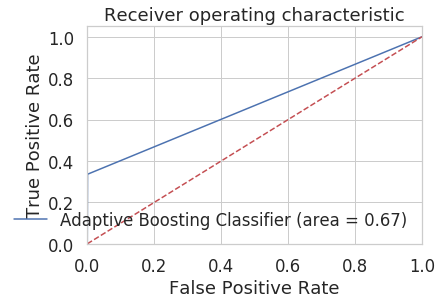

In [106]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(ytest, ypred)
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.figure()
plt.plot(fpr, tpr, label='Adaptive Boosting Classifier (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [107]:
# Cross Validation
from sklearn.model_selection import cross_val_score, KFold

xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['m13'].values.ravel(), random_state=42, test_size=0.2)
kfold = KFold(n_splits = 10, random_state = 7)
modelCV = AdaBoostClassifier()
scoring = 'f1_macro'
results_train = cross_val_score(modelCV, xtrain, ytrain, scoring = scoring, cv = kfold)
results_test = cross_val_score(modelCV, xtest, ytest, scoring = scoring, cv = kfold)
print("10-fold cross validation average accuracy on train data: %.3f" % (results_train.mean()))
print("10-fold cross validation average accuracy on test data: %.3f" % (results_test.mean()))
print("results_train:",results_train)
print("results_test:",results_test)

10-fold cross validation average accuracy on train data: 0.752
10-fold cross validation average accuracy on test data: 0.725
results_train: [0.76855367 0.76953333 0.69056441 0.76296987 0.77610773 0.76671369
 0.74188406 0.76296977 0.73783145 0.74569868]
results_test: [0.68641962 0.7491357  0.77164502 0.56098681 0.72059709 0.74870074
 0.80715223 0.74913532 0.73159873 0.72168262]


In [108]:
#solving data imbalanced problem
#We are interested in predicting deliquent cases (generally low number of records in imbalanced data)
#Our objective: High recall on 1 & High precision on L
#3 ways solve it;
#Modify Loss function
#Modify the dataset (resampling)
#Ensemble methods

# Randomly selecting 30% of non-deliquency data
from sklearn.utils import resample

cols = ['interest_rate', 'unpaid_principal_bal', 'loan_to_value','number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
        'source_new','max_deliq' ,'m11', 'm12','m13']
train = df.iloc[:116058,:][cols]
not_deliq = train[train['m13']==0]
deliq = train[train['m13']==1]

not_deliq_downsampled = resample(not_deliq, replace = False, n_samples = int(not_deliq.shape[0]*0.3), random_state = 27)
deliq['m13'].value_counts(), not_deliq['m13'].value_counts(), not_deliq_downsampled['m13'].value_counts()

(1    636
 Name: m13, dtype: int64, 0    115422
 Name: m13, dtype: int64, 0    34626
 Name: m13, dtype: int64)

In [109]:
df2 = deliq.append(not_deliq_downsampled, ignore_index=True)
df2['m13'] = df2['m13'].astype(int)
print(df2.shape, df2.columns)
df2['m13'].value_counts()

(35262, 11) Index(['interest_rate', 'unpaid_principal_bal', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'source_new', 'max_deliq', 'm11', 'm12', 'm13'],
      dtype='object')


0    34626
1      636
Name: m13, dtype: int64

In [110]:
train = df2.drop('m13',axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(train, df2['m13'].values.ravel(), random_state=42, test_size=0.1)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

model = AdaBoostClassifier(learning_rate= 0.68, n_estimators= 11)
model.fit(xtrain, ytrain)
# ypred = model.predict(xtest)
prediction = model.predict_proba(xtest) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.41 # if prediction is greater than or equal to 0.3 than 1 else 0
ypred = prediction_int.astype(np.int)

print("f1_score:",f1_score(ytest, model.predict(xtest))) # calculating f1 score
print("Accuracy on train data:",model.score(xtrain,ytrain))
print("Accuracy on test data:",model.score(xtest,ytest))
pd.crosstab(ypred,ytest)

(31735, 10) (3527, 10) (31735,) (3527,)
f1_score: 0.6105263157894737
Accuracy on train data: 0.9886875689302033
Accuracy on test data: 0.989509498157074


col_0,0,1
row_0,,
0,3426,22
1,44,35


In [111]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3470
           1       0.44      0.61      0.51        57

    accuracy                           0.98      3527
   macro avg       0.72      0.80      0.75      3527
weighted avg       0.98      0.98      0.98      3527



In [112]:
from imblearn.over_sampling import SMOTE

cols=['interest_rate', 'unpaid_principal_bal', 'loan_to_value','number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
      'source_new','max_deliq' ,'m11', 'm12']                                                   # Final 10
train = df1.iloc[:116058,:][cols]
test = df1.iloc[116058:,:][cols]

# setting up testing and training sets
xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['m13'].values.ravel(), random_state=42, test_size=0.1)

sm = SMOTE(random_state=27, ratio=1.0)
xtrain, ytrain = sm.fit_sample(xtrain, ytrain)
xtrain.shape, ytrain.shape

((207766, 10), (207766,))

In [113]:
model = AdaBoostClassifier()
model.fit(xtrain, ytrain) # training the model

ypred = model.predict(xtest)

print("f1_score:",f1_score(ytest, model.predict(xtest))) # calculating f1 score
print("Accuracy on train data:",model.score(xtrain,ytrain))
print("Accuracy on test data:",model.score(xtest,ytest))

f1_score: 0.3950617283950617
Accuracy on train data: 0.9689025153297459
Accuracy on test data: 0.991556091676719


In [114]:

# confusion_matrix = confusion_matrix(ytest,ypred)
# print(confusion_matrix)
pd.crosstab(ypred,ytest)

col_0,0,1
row_0,,
0,11476,35
1,63,32


In [115]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     11539
           1       0.34      0.48      0.40        67

    accuracy                           0.99     11606
   macro avg       0.67      0.74      0.70     11606
weighted avg       0.99      0.99      0.99     11606



In [116]:
#Hypertuning LogisticRegression

cols=['interest_rate', 'unpaid_principal_bal', 'loan_to_value','number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
      'source_new','max_deliq' ,'m11', 'm12']                                                   # Final 10
train = df.iloc[:116058,:][cols]

# using gridsearch & cross validation, hypertune best parameters of Logistic Regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['m13'].values.ravel(), random_state=42, test_size=0.2)
print(xtrain.shape)
model = LogisticRegression()
grid = {'C':[0.001,0.01,0.1,1,5,10],
       'penalty':['l1','l2'],
        'class_weight':['balanced']}
# cv = KFold(n_splits = 10, shuffle=True, random_state = 7)
clf = GridSearchCV(model, grid, n_jobs=8, cv=None,scoring='f1_macro')
clf.fit(xtrain, ytrain)

(92846, 10)


GridSearchCV(cv=None, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [117]:
clf.best_score_, clf.best_params_

(0.5496005255675921, {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1'})

In [118]:
model = LogisticRegression(C= 0.001, class_weight= 'balanced', penalty= 'l1')
model.fit(xtrain, ytrain)
# ypred = model.predict(xtest)
prediction = model.predict_proba(xtest) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.56 # if prediction is greater than or equal to 0.3 than 1 else 0
ypred = prediction_int.astype(np.int)

print("f1_score:",f1_score(ytest, ypred)) # calculating f1 score
print("Accuracy on train data:",model.score(xtrain,ytrain))
print("Accuracy on test data:",model.score(xtest,ytest))

f1_score: 0.17336152219873152
Accuracy on train data: 0.9464058763974754
Accuracy on test data: 0.9463208685162847


In [119]:
pd.crosstab(ypred,ytest)

col_0,0,1
row_0,,
0,22348,46
1,736,82


In [120]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     23084
           1       0.10      0.64      0.17       128

    accuracy                           0.97     23212
   macro avg       0.55      0.80      0.58     23212
weighted avg       0.99      0.97      0.98     23212



In [121]:
#Hypertuning AdaBoostClassifier

cols=['interest_rate', 'unpaid_principal_bal', 'loan_to_value','number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
      'source_new','max_deliq' ,'m11', 'm12']                                                   # Final 10
train = df.iloc[:116058,:][cols]

# using gridsearch & cross validation, hypertune best parameters of Logistic Regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['m13'].values.ravel(), random_state=42, test_size=0.2)
model = AdaBoostClassifier()
grid = {'n_estimators': [10,20,30,50,100],
        'learning_rate':[0.4,0.5,0.6,0.7]}
#         'learning_rate' : [0.5,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7]}
# cv = KFold(n_splits = 10, shuffle=True, random_state = 7)
clf = GridSearchCV(model, grid, n_jobs=8, cv=None,scoring='f1_macro')
clf.fit(xtrain, ytrain)

GridSearchCV(cv=None, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=8,
             param_grid={'learning_rate': [0.4, 0.5, 0.6, 0.7],
                         'n_estimators': [10, 20, 30, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [122]:
clf.best_score_, clf.best_params_

(0.7667595853363968, {'learning_rate': 0.7, 'n_estimators': 30})

In [123]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for m,s,p in zip(means,stds,params):
    print(m,s,p)

0.7046596533809035 0.019302109884666876 {'learning_rate': 0.4, 'n_estimators': 10}
0.732127439103918 0.006102397120974985 {'learning_rate': 0.4, 'n_estimators': 20}
0.7470157480138421 0.008811037812538522 {'learning_rate': 0.4, 'n_estimators': 30}
0.7466703815327671 0.006004488091070847 {'learning_rate': 0.4, 'n_estimators': 50}
0.7512639210491306 0.0024817459033097213 {'learning_rate': 0.4, 'n_estimators': 100}
0.7561236199907182 0.003020911646677634 {'learning_rate': 0.5, 'n_estimators': 10}
0.7640309114868771 0.009793961356078773 {'learning_rate': 0.5, 'n_estimators': 20}
0.7616152886007566 0.0079711130458199 {'learning_rate': 0.5, 'n_estimators': 30}
0.7650077941094516 0.0063161000636731066 {'learning_rate': 0.5, 'n_estimators': 50}
0.7627600900004547 0.005190850119185906 {'learning_rate': 0.5, 'n_estimators': 100}
0.761299474172225 0.00922409462538067 {'learning_rate': 0.6, 'n_estimators': 10}
0.7651320093318511 0.007552974348893952 {'learning_rate': 0.6, 'n_estimators': 20}
0.766

In [124]:
model = AdaBoostClassifier(learning_rate= 0.68, n_estimators= 11)
model.fit(xtrain, ytrain)
# ypred = model.predict(xtest)
prediction = model.predict_proba(xtest) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.445 # if prediction is greater than or equal to 0.3 than 1 else 0
ypred = prediction_int.astype(np.int)

print("f1_score:",f1_score(ytest, ypred)) # calculating f1 score
print("Accuracy on train data:",model.score(xtrain,ytrain))
print("Accuracy on test data:",model.score(xtest,ytest))

f1_score: 0.49090909090909096
Accuracy on train data: 0.9957133317536566
Accuracy on test data: 0.9955195588488712


In [125]:
pd.crosstab(ypred,ytest)

col_0,0,1
row_0,,
0,23046,74
1,38,54


In [126]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23084
           1       0.59      0.42      0.49       128

    accuracy                           1.00     23212
   macro avg       0.79      0.71      0.74     23212
weighted avg       0.99      1.00      0.99     23212



In [127]:
#Finally generate test results for sample submission

cols = ['interest_rate', 'unpaid_principal_bal', 'loan_to_value','number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
        'source_new','max_deliq' ,'m11', 'm12']                                # Finally selected columns

train = df.iloc[:116058,:][cols]
test = df.iloc[116058:,:][cols]
ytrain = df_train['m13']

model = AdaBoostClassifier(learning_rate=0.68,n_estimators=11)
# model = LogisticRegression(C= 0.001, class_weight= 'balanced', penalty= 'l1')
model.fit(train, ytrain) # training the model

prediction = model.predict_proba(test) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.445# if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

# prediction_int = model.predict(test)

df_sample_submission['m13'] = list(prediction_int)
df_sample_submission['m13'].value_counts()

SyntaxError: ignored

In [0]:
df_sample_submission.to_csv('submission_file.csv',index=False)